<h5>Simple Linear Regression</h5>
Simple linear regression provides model of relationship between the magnitude of one variable and that of second.
<h6>Response/Dependent variable/Target</h6>Variable we are trying to predict
<h6>Independent Variable</h6>The variable used to predict the response.
<h6>Intercept</h6>Predicted value when x=0
<h6>Regression Coefficient</h6>Slope of a regression line
<h6>Residual</h6>Difference between the observed values and fitted values
<h6>Least Squares also called LSR(Least Squares Regression) OR OLS(Ordinary Least Squares)</h6>The method of fitting a regression by minimizing the sum of squared residuals.
<br>Y = b0 + b1 * X

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [24]:
from sklearn.linear_model import LinearRegression
predictors = ['age'] #
outcome = 'charges'
model = LinearRegression()
model.fit(df[predictors], df[outcome])
print("Intercept :",model.intercept_)
print("Slope :",model.coef_[0])

Intercept : 3165.885006063014
Slope : 257.7226186668958


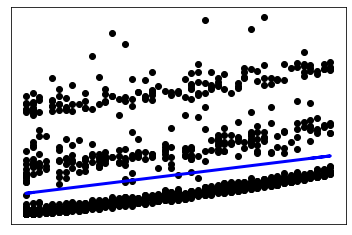

In [30]:
plt.scatter(df['age'], df['charges'], color="black")
plt.plot(df[predictors], model.predict(df[predictors]), color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [34]:
pred_data = model.predict(df[predictors])
pred_data


array([ 8062.61476073,  7804.89214207, 10382.11832874, ...,
        7804.89214207,  8578.05999807, 18886.96474474])

<h5>Multiple Linear Regression</h5>
When there are multiple predictors, the equation is simply extended to accommodate
them:<br>
<strong>Y = b0 + b1X1 + b2X2 + ... + bpXp + e</strong>

<h6>Root mean square error</h6>The square root of the average squared error of the regression
<h6>R-Squared</h6>The proportion of variance explained by the model, from 0 to 1. Also called coefficient of determination. R-squared ranges from 0 to 1 and measures the proportion of variation in the data that is accounted for in the model. In simple terms R-squared states thathow much is the variance between actual and predicted values if its close to one there is not much difference but if it is close to 0 then there line fit is not so good.
<h6>Assessing the model</h6>
1. Root mean squared error(RMSE)
2. Residual Standard Error(RSE)

<h6>K-fold Cross Validation</h6>It would make a lot of sense to set aside some of the original data, not use it to fit the model, and then apply the model to the set-aside (holdout) data to see how well it does.
Algorithm for k-fold cross validation - 
1. Set aside 1/k of the data as a holdout sample.<br>
2. Train the model on the remaining data.<br>
3. Apply (score) the model to the 1/k holdout, and record needed model assessment metrics.<br>
4. Restore the first 1/k of the data, and set aside the next 1/k (excluding any records that got picked the first time).<br>
5. Repeat steps 2 and 3.<br>

Including additional variables always reduces RMSE and increases R-squared for the training data. So to build simpler and effective model we can use adjusted R-squared. To reduce the complexity of model and create an effective model there are various methods to select variables that contribute the most to predicting target variable correctly, such as Forward Selection, Backward elimination etc.

In case of Forward selection and backward elimination we add or remove the variable entirely so it will not contribute anything in the prediction but there are some methods where we use penalized coefficients of those variables who do not contribute much. Ridge and Lasso regression are the examples of these methods.

<b>Dangers of Extrapolation</b>Regression models should not be used to extrapolate beyond the range of the data.The model is valid only for predictor values for which the data has sufficient values.



In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
predictors = ['age','bmi','children']
outcome = 'charges'
model = LinearRegression()
model.fit(df[predictors], df[outcome])
print("Intercept :",model.intercept_)
print("Slope :",model.coef_[0])

Intercept : -6916.24334778704
Slope : 239.99447429364636


In [50]:
fitted = model.predict(df[predictors])
RMSE = np.sqrt(mean_squared_error(df[outcome], fitted))
r2 = r2_score(df[outcome], fitted)
print(f'RMSE: {RMSE:.0f}')
print(f'r2: {r2:.4f}')

RMSE: 11355
r2: 0.1201


<b>Factor Variables/Categorical Variables in Rgression</b>
We need to convert these categorical variables into numerical form before using in our model. One hot encoding is the standard way to convert these variables into numerical format.

<b>Factor Variables with Many levels</b>
In case of factor variables having huge number of categories eg.zip code - we need to group some ddata based on observations and analysis to reduce the categorical variables.

<b>Ordered Factor Variable</b>
Ordered factor variables are categorical variables with specific ordering such as grades of student. A, B, C

<h2>Interpreting Regression Equation</h2>
<b>Correlated Predictors</b>
There are sometimes variables which we are using in multiple linear regression which are correlated to each other and due to this it affects the performance and gives uncanny results of coefficients for those correlated variables.
Eg. In house price prediction - size of house and number of bedrooms - correlated

<b>Multicollinearity</b>
If two variables in predictors are very similar to each other or one can be expressed as linear combination of other then there is multicollinearity in the data and outcomes are not correct for multiple linear regression.

<b>Confounding Variable</b>
The variables that we did not account for while building our regression model and which are very important

<h2>Regression Diagnostics</h2>
<b>Outliers</b>
Outliers are the distant data points from the rest of the data. Outliers can cause problems in regression models.

<b>Influential Values</b>
There can be some values in data which dramatically affects the regression equation but do not fall into outlier. Such data points have leverage over the regression equation. 